# Registration Sandbox
This notebook is a test-bed for regularization and reconstruction methods

In [1]:
%matplotlib notebook
%load_ext autoreload
%autoreload 2

# Load motiondeblur module and Dataset class
import libwallerlab.projects.motiondeblur as md
from libwallerlab.utilities.io import Dataset, isDataset

# Platform imports
import os, glob

# Debugging imports
import llops as yp
import numpy as np
import matplotlib.pyplot as plt

yp.config.setDefaultBackend('arrayfire')

## Load Data

In [2]:
# Define user for path setting
dataset_path = '/Users/zfphil/datasets/motiondeblur/'

# Define which dataset to use
dataset_type = 'coded'
dataset_label =  'res'

# Find files in this directory
folder_list = glob.glob(os.path.join(dataset_path, '*/'))
dataset_list = [folder for folder in folder_list if isDataset(folder)]

# Filter datasets in directory
filtered_dataset_list = [folder_name for folder_name in folder_list if (dataset_type in folder_name) and (dataset_label in folder_name)]
assert not len(filtered_dataset_list) > 1, "More than one dataset with criterion found!"
assert not len(filtered_dataset_list) == 0, "No dataset with criterion found!"

# Create dataset object (loads metadata)
dataset = Dataset(filtered_dataset_list[0])

# Force type to be motiondeblur
dataset.metadata.type = 'motiondeblur'

# Select green channel
dataset.channel_mask = [0]

# Preprocess dataset (md-specific)
md.preprocess(dataset)

Loading 1 frames...


/Users/zfphil/.conda/lib/python3.7/site-packages/arrayfire/array.py:157: ComplexWarning: Casting complex values to real discards the imaginary part
  c_val = c_double_t(val)


# Create Reconstruction Object And Normalize Measurements

In [18]:
# Set position segment
dataset.position_segment_indicies = [1]
# dataset.frame_mask = [20, 21, 22]

# Create recon object
recon = md.recon.Reconstruction(dataset, alpha_blend_distance=2000, pad_value=0, background_estimation_method=None)

# Apply frame-dependent position offset
recon.applyFrameDependentOffset(offset=26)

# Normalize measurements
scale = recon.normalize_measurements(wrap_coefficient=0.22)  #0.22

Calculated wrapping coefficient 0.11


<IPython.core.display.Javascript object>


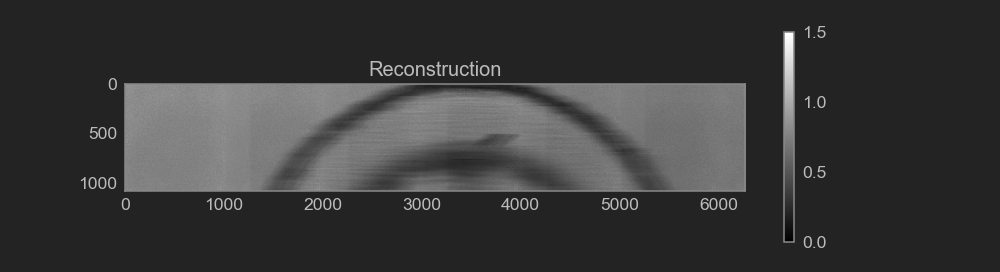

In [14]:
# recon._gen_forward_operators()
recon.reconstruct(iteration_count=-1, step_size=1, mode='static', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

Minimizing function:


<IPython.core.display.Latex object>

|  Iter  |      Cost      | Elapsed time (s) |  Norm of Step  | Memory Usage (CPU/GPU) |
+ ------ + -------------- + ---------------- + -------------- + ---------------------- +
|    0   |    1.54e+06    |       0.00       |    0.00e+00    |  447.6 MB / 2599.9 MB  |
|   10   |    2.58e+03    |       2.61       |    6.50e-01    |  447.6 MB / 2683.4 MB  |
|   20   |    2.56e+03    |       5.43       |    3.96e-01    |  447.6 MB / 2683.4 MB  |
|   30   |    2.57e+03    |       8.21       |    1.88e-01    |  447.6 MB / 2683.4 MB  |
|   40   |    2.57e+03    |      11.00       |    9.48e-02    |  447.6 MB / 2683.4 MB  |
|   50   |    2.57e+03    |      13.78       |    2.53e-02    |  447.6 MB / 2683.4 MB  |
|   60   |    2.57e+03    |      16.55       |    1.57e-02    |  447.6 MB / 2683.4 MB  |
|   70   |    2.57e+03    |      19.37       |    2.01e-02    |  447.6 MB / 2683.4 MB  |
|   80   |    2.57e+03    |      22.12       |    8.67e-03    |  447.6 MB / 2683.4 MB  |
|   90   |    2.57e+0

<IPython.core.display.Javascript object>


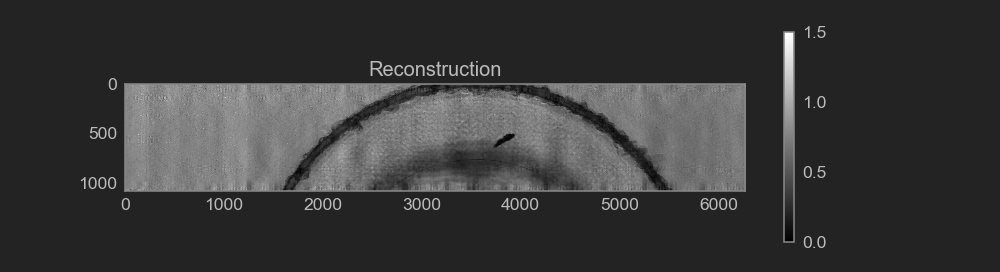

In [19]:
# recon._gen_forward_operators()
recon.reconstruct(iteration_count=100, step_size=1, mode='global', reg_types={'l2': 1e-3, 'tv': 5e-4})
recon.show(clim=(0,1.5))

In [84]:
x_gauss = recon.y_list[0].copy()

In [ ]:
x_svd = recon.y_list[0].copy()

In [82]:
x_none = recon.y_list[0].copy()

In [86]:
yp.scalar(yp.sum(yp.real(x_gauss - x_none)))

1218.997